In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
list1 =[]

for year in range(2002, 2019):
    X = pd.read_csv('FF offense '+str(year)+'.csv')
    X['YEAR'] = year
    list1.append(X)
    
list1.reverse()
ALL = pd.concat(list1)
ALL = ALL.reset_index(drop=True)
ALL = ALL[ALL.POS != 'FB']

for N in ALL.NAME:
    if N[-2:] == ' P' or N[-2:] == ' O' or N[-2:] == ' Q' or N[-2:] == ' D':
        ALL.NAME = ALL.NAME.replace(N, N[:-2])
    if N[-3:] == ' IR':
        ALL.NAME = ALL.NAME.replace(N, N[:-3])
    if N[-4:] == ' SUS':
        ALL.NAME = ALL.NAME.replace(N, N[:-4])
        
N_QB = ALL[ALL.POS != 'QB']
N_QB = N_QB[N_QB['PASS YDS'] > 106]
ind = N_QB.index.values

for p in N_QB.POS:
    N_QB.POS = N_QB.POS.replace(p, 'QB')
    
for i in ind:
    ALL.loc[i] = N_QB.loc[i]    

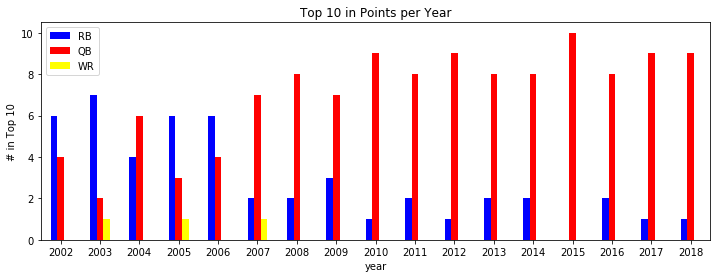

In [3]:
TOP10 = []

for year in range(2002, 2019):
    df = ALL[ALL.YEAR == year]
    TOP10.append(df.head(10).POS.value_counts())

df = pd.DataFrame(TOP10).fillna(0)
df.index = ALL.YEAR.unique()[::-1]

df.plot(kind='bar', color=['blue', 'red', 'yellow'], figsize=(12,4), rot=0)
plt.xlabel('year')
plt.ylabel('# in Top 10')
plt.title('Top 10 in Points per Year')
plt.show()

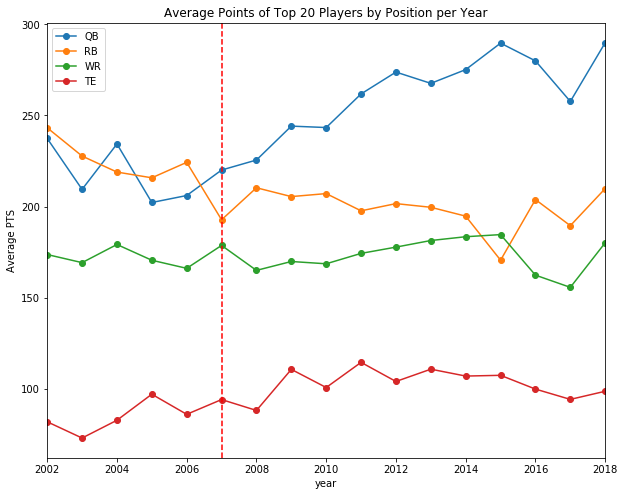

In [4]:
X = []

for year in range(2002, 2019):
    df = ALL[ALL.YEAR == year]
    X.append([df[df.POS == 'QB'][:20].PTS.mean(), 
              df[df.POS == 'RB'][:20].PTS.mean(), 
              df[df.POS == 'WR'][:20].PTS.mean(), 
              df[df.POS == 'TE'][:20].PTS.mean()])
    
df = pd.DataFrame(X, columns=['QB', 'RB', 'WR', 'TE']) 
df.index = ALL.YEAR.unique()[::-1]

df.plot(figsize=(10,8), marker='o')
plt.xlabel('year')
plt.ylabel('Average PTS')
plt.title('Average Points of Top 20 Players by Position per Year')
plt.axvline(2007, color='r', linestyle='--')
plt.show()

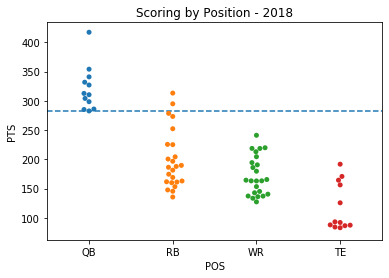

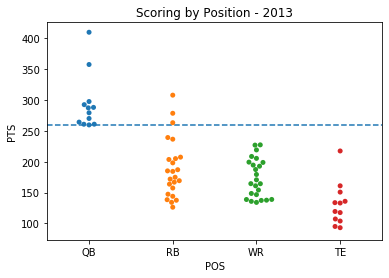

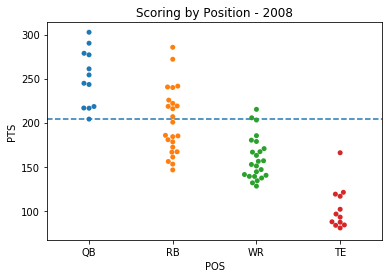

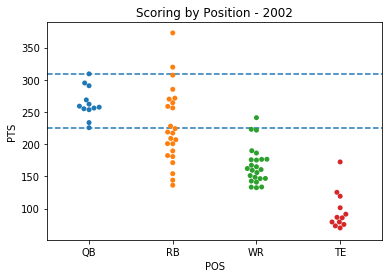

In [6]:
grouping = []
position = ['QB', 'RB', 'WR', 'TE']

for year in range(2002, 2019):
    df = ALL[ALL.YEAR == year]
    for pos in position:
        if pos == 'QB' or pos == 'TE':
            grouping.append(df[df.POS == pos][:12])
        else:
            grouping.append(df[df.POS == pos][:24])
    
TOP = pd.concat(grouping)
TOP = TOP.reset_index(drop=True)

df18 = TOP[TOP.YEAR == 2018]
df13 = TOP[TOP.YEAR == 2013]
df08 = TOP[TOP.YEAR == 2008]
df02 = TOP[TOP.YEAR == 2002] 

sns.swarmplot(x='POS', y='PTS', data=df18)
plt.axhline(df18[df18.POS == 'QB'].PTS.min(), linestyle='--')
plt.title('Scoring by Position - 2018')
plt.show()

sns.swarmplot(x='POS', y='PTS', data=df13)
plt.axhline(df13[df13.POS == 'QB'].PTS.min(), linestyle='--')
plt.title('Scoring by Position - 2013')
plt.show()

sns.swarmplot(x='POS', y='PTS', data=df08)
plt.axhline(df08[df08.POS == 'QB'].PTS.min(), linestyle='--')
plt.title('Scoring by Position - 2008')
plt.show()

sns.swarmplot(x='POS', y='PTS', data=df02)
plt.axhline(df02[df02.POS == 'QB'].PTS.min(), linestyle='--')
plt.axhline(df02[df02.POS == 'QB'].PTS.max(), linestyle='--')
plt.title('Scoring by Position - 2002')
plt.show()

In [7]:
QB_STD5 = []
RB_STD5 = []
WR_STD5 = []
TE_STD5 = []

for year in range(2002, 2019):
    df = ALL[ALL.YEAR == year]
    QB = df[df.POS == 'QB']
    list2 =[]
    x = 0
    for i in range(int(len(QB)/5)):
        QB_STD5.append(QB['PTS'][x:x+5].std())
        x=x+5
        
    RB = df[df.POS == 'RB']
    list2 =[]
    x = 0
    for i in range(int(len(RB)/5)):
        RB_STD5.append(RB['PTS'][x:x+5].std())
        x=x+5
        
    WR = df[df.POS == 'WR']
    list2 =[]
    x = 0
    for i in range(int(len(WR)/5)):
        WR_STD5.append(WR['PTS'][x:x+5].std())
        x=x+5

    TE = df[df.POS == 'TE']
    list2 =[]
    x = 0
    for i in range(int(len(TE)/5)):
        TE_STD5.append(TE['PTS'][x:x+5].std())
        x=x+5

In [8]:
QB_AVG5 = []
RB_AVG5 = []
WR_AVG5 = []
TE_AVG5 = []

for year in range(2002, 2019):
    df = ALL[ALL.YEAR == year]
    QB = df[df.POS == 'QB']
    list2 =[]
    x = 0
    for i in range(int(len(QB)/5)):
        QB_AVG5.append(QB['PTS'][x:x+5].mean())
        x=x+5
        
    RB = df[df.POS == 'RB']
    list2 =[]
    x = 0
    for i in range(int(len(RB)/5)):
        RB_AVG5.append(RB['PTS'][x:x+5].mean())
        x=x+5
        
    WR = df[df.POS == 'WR']
    list2 =[]
    x = 0
    for i in range(int(len(WR)/5)):
        WR_AVG5.append(WR['PTS'][x:x+5].mean())
        x=x+5

    TE = df[df.POS == 'TE']
    list2 =[]
    x = 0
    for i in range(int(len(TE)/5)):
        TE_AVG5.append(TE['PTS'][x:x+5].mean())
        x=x+5

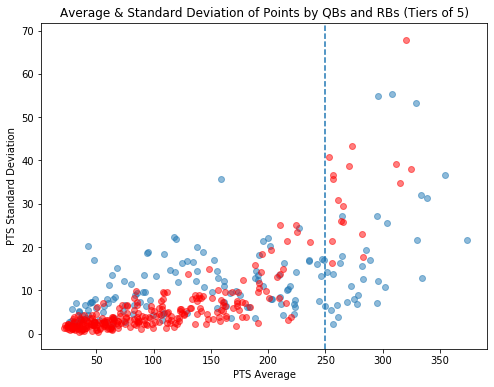

In [9]:
data = {'PTS AVG' : QB_AVG5, 'PTS STD': QB_STD5}
QB = pd.DataFrame(data)
        
data = {'PTS AVG' : RB_AVG5, 'PTS STD': RB_STD5}
RB = pd.DataFrame(data)

QB
plt.figure(figsize=(8,6))
plt.scatter(QB['PTS AVG'], QB['PTS STD'], alpha=.5)
plt.scatter(RB['PTS AVG'], RB['PTS STD'], alpha=.5, color='red')
plt.xlabel('PTS Average')
plt.ylabel('PTS Standard Deviation')
plt.axvline(250, linestyle='--')
plt.title('Average & Standard Deviation of Points by QBs and RBs (Tiers of 5)')
plt.show()

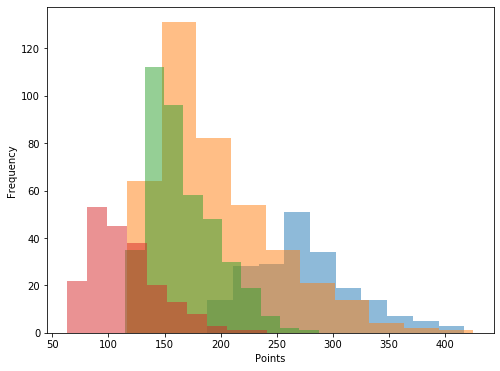

In [10]:
plt.figure(figsize=(8,6))
plt.hist(TOP[TOP.POS == 'QB'].PTS, alpha=.5)
plt.hist(TOP[TOP.POS == 'RB'].PTS, alpha=.5)
plt.hist(TOP[TOP.POS == 'WR'].PTS, alpha=.5)
plt.hist(TOP[TOP.POS == 'TE'].PTS, alpha=.5)
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.show()

In [11]:
percentiles = [95, 75, 50, 25, 5]
qb_percentiles = []
rb_percentiles = []
wr_percentiles = []
te_percentiles = []

for p in percentiles:
    qb_percentiles.append(np.percentile(TOP[TOP.POS == 'QB'].PTS, p))
    rb_percentiles.append(np.percentile(TOP[TOP.POS == 'RB'].PTS, p))
    wr_percentiles.append(np.percentile(TOP[TOP.POS == 'WR'].PTS, p))
    te_percentiles.append(np.percentile(TOP[TOP.POS == 'TE'].PTS, p))

In [12]:
data = {'PTS Percentile': percentiles, 'QB' : qb_percentiles, 'RB': rb_percentiles, 'WR': wr_percentiles, 'TE': te_percentiles}

df = pd.DataFrame(data)
df.set_index('PTS Percentile')

,QB,RB,WR,TE
PTS Percentile,,,,
95,359.720,303.460,222.680,171.550
75,299.120,225.125,185.225,131.600
50,270.250,181.250,160.480,109.550
25,243.700,157.800,142.575,91.485
5,208.767,135.800,129.800,73.215
